# Connect to the database and print out a list of all spatial tables available

Note that it also prints out the projection of each. One table uses `4326` and the other uses `2272`.

In [32]:
from postgis_helpers import PostgreSQL
import matplotlib.pyplot as plt

db = PostgreSQL("example_db", verbosity="minimal")

db.all_spatial_tables_as_dict()

🏄🌊 example_db @ localhost 🌊🌊


{'phl_vision_zero_2017': 4326, 'phl_neighborhoods': 2272}

## Read in the neighborhood data

And use geopandas `.to_crs()` to reproject to `4326`

In [16]:
nhoods = db.query_as_geo_df("SELECT * FROM phl_neighborhoods")

nhoods = nhoods.to_crs("EPSG:4326")

nhoods.head()

,gid,level_0,level_1,name,listname,mapname,shape_leng,shape_area,explode,geom,uid
0,0,0,0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"(0,0)","POLYGON ((-75.06773 40.00540, -75.06765 40.005...",1
1,1,1,0,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"(1,0)","POLYGON ((-75.01560 40.09487, -75.01768 40.092...",2
2,2,2,0,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"(2,0)","POLYGON ((-75.18848 40.07273, -75.18846 40.072...",3
3,3,3,0,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"(3,0)","POLYGON ((-75.21221 40.08604, -75.21210 40.086...",4
4,4,4,0,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"(4,0)","POLYGON ((-75.18478 40.02837, -75.18426 40.027...",5


## Read the vision zero corridor data

In [11]:
vz_corridors = db.query_as_geo_df("SELECT * FROM phl_vision_zero_2017")

vz_corridors.head()

,gid,level_0,level_1,objectid,stname,explode,geom,uid
0,0,0,0,1,ACADEMY RD,"(0,0)","LINESTRING (-75.00789 40.05238, -75.00829 40.0...",1
1,1,1,0,2,ADAMS AVE,"(1,0)","LINESTRING (-75.11355 40.04271, -75.11344 40.0...",2
2,2,2,0,3,ARAMINGO AVE,"(2,0)","LINESTRING (-75.10390 39.98980, -75.10160 39.9...",3
3,3,3,0,4,ARAMINGO AVE,"(3,0)","LINESTRING (-75.12399 39.97258, -75.12391 39.9...",4
4,4,4,0,5,ARAMINGO AVE,"(4,0)","LINESTRING (-75.07748 40.00414, -75.07662 40.0...",5


# Use `matplotlib.pyplot` to overlay & view the two datasets in a notebook

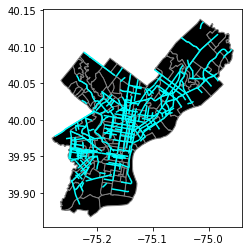

In [29]:
# Create the figure
f, ax = plt.subplots(1)

# Add each layer to the figure
nhoods.plot(ax=ax, color="black", edgecolor="gray")
vz_corridors.plot(ax=ax, color="cyan")


plt.show()